***Primer proyecto de simulación matemática***

# "Predecir precio del dólar"

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
def datos(archivo, columnas):
    file = pd.read_csv(archivo) #se importa el archivo.
    n = len(file['Fecha']) #se calcula la longitud de los datos. 
    cierre = file['Cierre'].values
    en_blanco = np.zeros((n-columnas,columnas)) #se crea un array en blanco de dimensiones(n-columna * colummna)
    for k in np.arange(columnas): 
        en_blanco[:,k] = cierre[k:n-columnas+k] #se rellenan los datos vacíos con los originales.
    return(en_blanco, cierre)

In [3]:
archivo = 'USD_MXN.csv'    
data, linear = datos(archivo, 31)
data

array([[18.819 , 18.776 , 18.8068, ..., 18.8936, 18.8935, 18.982 ],
       [18.776 , 18.8068, 18.838 , ..., 18.8935, 18.982 , 19.1373],
       [18.8068, 18.838 , 18.895 , ..., 18.982 , 19.1373, 18.8826],
       ...,
       [11.8145, 11.235 , 11.2   , ..., 10.145 , 10.1625, 10.135 ],
       [11.235 , 11.2   , 10.96  , ..., 10.1625, 10.135 , 10.145 ],
       [11.2   , 10.96  , 10.92  , ..., 10.135 , 10.145 , 10.095 ]])

In [4]:
b = data[:,0]
A = data[:,1:]
A, b

(array([[18.776 , 18.8068, 18.838 , ..., 18.8936, 18.8935, 18.982 ],
        [18.8068, 18.838 , 18.895 , ..., 18.8935, 18.982 , 19.1373],
        [18.838 , 18.895 , 18.8882, ..., 18.982 , 19.1373, 18.8826],
        ...,
        [11.235 , 11.2   , 10.96  , ..., 10.145 , 10.1625, 10.135 ],
        [11.2   , 10.96  , 10.92  , ..., 10.1625, 10.135 , 10.145 ],
        [10.96  , 10.92  , 11.04  , ..., 10.135 , 10.145 , 10.095 ]]),
 array([18.819 , 18.776 , 18.8068, ..., 11.8145, 11.235 , 11.2   ]))

Se toma por supuesto que el precio de un día será dado por el precio de 30 días anteriores. Se tiene el resultado algebráico: $$Ax = b$$ dónde A es la matriz nombrada de valores de ingreso y b es el resultado. 
se despeja x para conseguir el vector con el cual se harán aproximaciones posteriormente. 
$$x = A^{-1}b$$

In [5]:
x = np.linalg.pinv(A).dot(b)
x, len(x)

(array([ 9.73588406e-01, -4.95386517e-04, -1.34215421e-03,  1.20240964e-02,
        -4.12632310e-02,  1.26364132e-01, -8.49968250e-02,  7.33702673e-02,
        -4.86844621e-02,  9.92309388e-03,  3.44808057e-03, -3.57375544e-02,
         4.93039900e-03, -1.37626974e-02,  4.23376656e-02, -2.60167939e-02,
        -1.29787848e-02, -2.95980351e-02,  5.81861925e-02,  7.88262352e-03,
         4.87429776e-03, -4.12241544e-02,  1.25482087e-02,  4.32104616e-02,
        -7.13789923e-02,  1.50409753e-02,  6.48299094e-02, -8.47440052e-02,
         4.93332937e-02, -9.49262862e-03]), 30)

Ahora que se tiene el vector X ingresamos los últimos 30 datos y los evalúamos con el vector para conseguir una aproximación de la nueva cotización. 

In [6]:
pred = linear[0:30]

En la variable pred almacenamos los últimos 30 datos obtenidos de las cotizaciones del dolar-peso y la multiplicamos vectorialmente por la variable x. El resultado deberá ser un número cercano al precio nuevo.

In [7]:
pred.dot(x)

18.816193614698225

Como valor nos arroja que el precio del día 20 de septiembre deberá ser cercano a   **18.816193** .  Después de consultar el precio de cierre del día 20 de septiembre confirmamos que es de:   **18.7972**   Obteniendo un error de   **0.1%**   en la predicción del nuevo precio. 

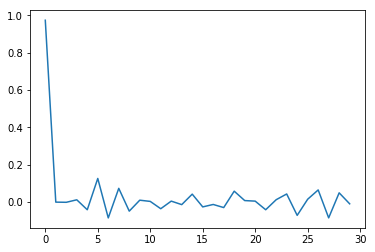

In [8]:
plt.plot(x)

In [9]:
x

array([ 9.73588406e-01, -4.95386517e-04, -1.34215421e-03,  1.20240964e-02,
       -4.12632310e-02,  1.26364132e-01, -8.49968250e-02,  7.33702673e-02,
       -4.86844621e-02,  9.92309388e-03,  3.44808057e-03, -3.57375544e-02,
        4.93039900e-03, -1.37626974e-02,  4.23376656e-02, -2.60167939e-02,
       -1.29787848e-02, -2.95980351e-02,  5.81861925e-02,  7.88262352e-03,
        4.87429776e-03, -4.12241544e-02,  1.25482087e-02,  4.32104616e-02,
       -7.13789923e-02,  1.50409753e-02,  6.48299094e-02, -8.47440052e-02,
        4.93332937e-02, -9.49262862e-03])

In [11]:
archivo = 'USD_MXN.csv'    
data, linear = datos(archivo, 6)
data

array([[18.819 , 18.776 , 18.8068, 18.838 , 18.895 , 18.8882],
       [18.776 , 18.8068, 18.838 , 18.895 , 18.8882, 18.8335],
       [18.8068, 18.838 , 18.895 , 18.8882, 18.8335, 19.0177],
       ...,
       [10.3365, 10.285 , 10.235 , 10.145 , 10.1625, 10.135 ],
       [10.285 , 10.235 , 10.145 , 10.1625, 10.135 , 10.145 ],
       [10.235 , 10.145 , 10.1625, 10.135 , 10.145 , 10.095 ]])

In [12]:
b = data[:,0]
A = data[:,1:]
A, b

(array([[18.776 , 18.8068, 18.838 , 18.895 , 18.8882],
        [18.8068, 18.838 , 18.895 , 18.8882, 18.8335],
        [18.838 , 18.895 , 18.8882, 18.8335, 19.0177],
        ...,
        [10.285 , 10.235 , 10.145 , 10.1625, 10.135 ],
        [10.235 , 10.145 , 10.1625, 10.135 , 10.145 ],
        [10.145 , 10.1625, 10.135 , 10.145 , 10.095 ]]),
 array([18.819 , 18.776 , 18.8068, ..., 10.3365, 10.285 , 10.235 ]))

In [13]:
x = np.linalg.pinv(A).dot(b)
x, len(x)

(array([ 0.96478304,  0.01054616, -0.00331316,  0.01196263,  0.01621708]), 5)

In [16]:
pred = linear[0:5]

In [17]:
pred.dot(x)

18.82373064683572

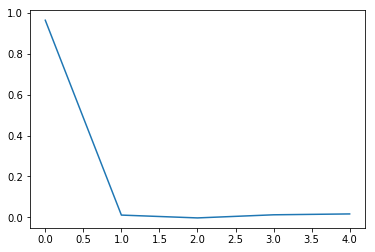

In [18]:
plt.plot(x)

Por lo tanto la aproximácion del precio tomando solamente los ultimos 5 días es peor ya que fue más inexacta. No refleja la tendencia en la variación del precio.